In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.14.0
    Uninstalling typing_extensions-4.14.0:
      Successfully uninstalled typing_extensions-4.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 r

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os

# Leer el CSV
df = pd.read_csv('cleaned_products.csv')

# Tomar una sola URL (ajusta el nombre de la columna si es diferente)
url = df.loc[100, 'url']  # Cambia 'url' si tu columna tiene otro nombre


In [ ]:
# Reemplazar 'l.jpg' por 'L.jpg' al final de cada URL
df['image'] = df['image'].str.replace('l.jpg', 'L.jpg', regex=False)

# Verificar los primeros resultados
print(df['image'].head())

0    https://dcuk1cxrnzjkh.cloudfront.net/imagespro...
1    https://dcuk1cxrnzjkh.cloudfront.net/imagespro...
2    https://dcuk1cxrnzjkh.cloudfront.net/imagespro...
3    https://dcuk1cxrnzjkh.cloudfront.net/imagespro...
4    https://dcuk1cxrnzjkh.cloudfront.net/imagespro...
Name: image, dtype: object


In [ ]:
import os
import requests
import pandas as pd

headers = {'User-Agent': 'Mozilla/5.0'}

# Ruta en Google Drive
output_folder = '/content/drive/Shared drives/Desarrollo/product_images'
os.makedirs(output_folder, exist_ok=True)

In [ ]:
for idx, row in df.iterrows():
    image_url = row['image']
    if pd.notnull(image_url):
        try:
            # Manejar URL relativa (aunque ya deberías tener las completas)
            if not image_url.startswith('http'):
                base_url = "https://dcuk1cxrnzjkh.cloudfront.net/imagesproducto/"
                full_image_url = base_url + image_url
            else:
                full_image_url = image_url

            response = requests.get(full_image_url, headers=headers, timeout=10, stream=True)
            response.raise_for_status()

            image_name = f"{row['id']}.jpg"
            image_path = os.path.join(output_folder, image_name)

            with open(image_path, 'wb') as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)

            print(f"⬇️ Imagen descargada: {image_name} (fila {idx})")

        except Exception as e:
            print(f"⚠️ Error descargando {full_image_url}: {e}")

# Guardar el DataFrame actualizado (también en Drive si quieres)
df.to_csv('/content/drive/MyDrive/updated_products_with_images.csv', index=False)

⬇️ Imagen descargada: P0000.jpg (fila 0)
⬇️ Imagen descargada: P0001.jpg (fila 1)
⬇️ Imagen descargada: P0002.jpg (fila 2)
⬇️ Imagen descargada: P0003.jpg (fila 3)
⬇️ Imagen descargada: P0004.jpg (fila 4)
⬇️ Imagen descargada: P0005.jpg (fila 5)
⬇️ Imagen descargada: P0006.jpg (fila 6)
⬇️ Imagen descargada: P0007.jpg (fila 7)
⬇️ Imagen descargada: P0008.jpg (fila 8)
⬇️ Imagen descargada: P0010.jpg (fila 10)
⬇️ Imagen descargada: P0011.jpg (fila 11)
⬇️ Imagen descargada: P0012.jpg (fila 12)
⬇️ Imagen descargada: P0013.jpg (fila 13)
⬇️ Imagen descargada: P0014.jpg (fila 14)
⬇️ Imagen descargada: P0015.jpg (fila 15)
⬇️ Imagen descargada: P0016.jpg (fila 16)
⬇️ Imagen descargada: P0017.jpg (fila 17)
⬇️ Imagen descargada: P0018.jpg (fila 18)
⬇️ Imagen descargada: P0019.jpg (fila 19)
⬇️ Imagen descargada: P0020.jpg (fila 20)
⬇️ Imagen descargada: P0021.jpg (fila 21)
⬇️ Imagen descargada: P0022.jpg (fila 22)
⬇️ Imagen descargada: P0023.jpg (fila 23)
⬇️ Imagen descargada: P0024.jpg (fila 24)
⬇

In [ ]:
count_null_images = df['image'].isnull().sum()
print(f"Number of rows where 'image' is null: {count_null_images}")

Number of rows where 'image' is null: 15


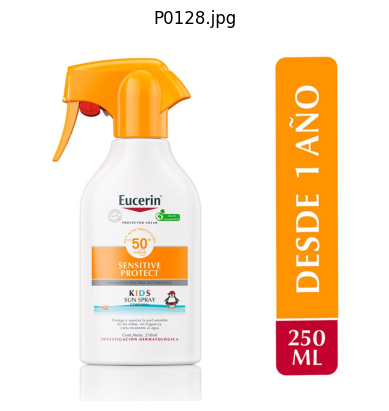

In [ ]:
# prompt: display random image

import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# List all files in the output folder
image_files = [f for f in os.listdir(output_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

if image_files:
    # Select a random image file
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(output_folder, random_image_file)

    # Display the image
    img = mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title(random_image_file)
    plt.axis('off') # Hide axes
    plt.show()
else:
    print("No image files found in the specified folder.")
